**Dataset**  - The advertising dataset captures the sales revenue generated with respect to advertisement costs across four platforms

Task of the model is to forecast the possible sales.

**Features**:
Digital, TV, Radio, Newspaper

**Target** (Label): Sales budget

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense


In [2]:
url = 'https://github.com/urszulao/projects/blob/main/AI-neural_networks/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)


In [3]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [4]:
advertising_df.head(10)

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
6,13.05,8.7,48.9,75.0,7.2
7,86.25,57.5,32.8,23.5,11.8
8,180.30,120.2,19.6,11.6,13.2
9,12.90,8.6,2.1,1.0,4.8
10,299.70,199.8,2.6,21.2,10.6


In [5]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [6]:
advertising_df.shape

(1199, 5)

In [7]:
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
advertising_df.isnull().values.any()

False

<Axes: >

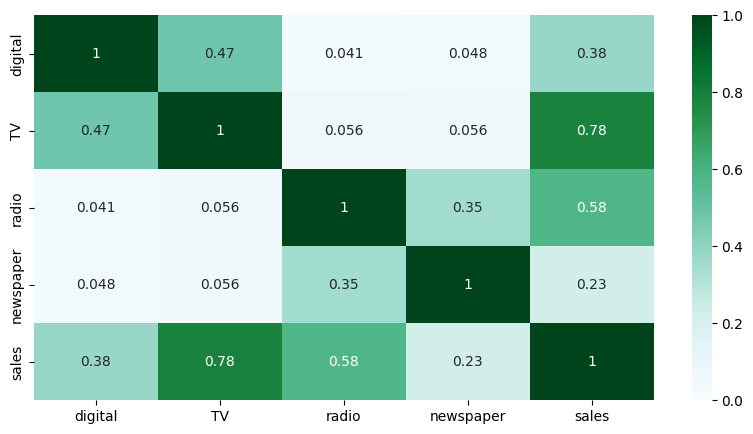

In [27]:
#heatmap
plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='BuGn')


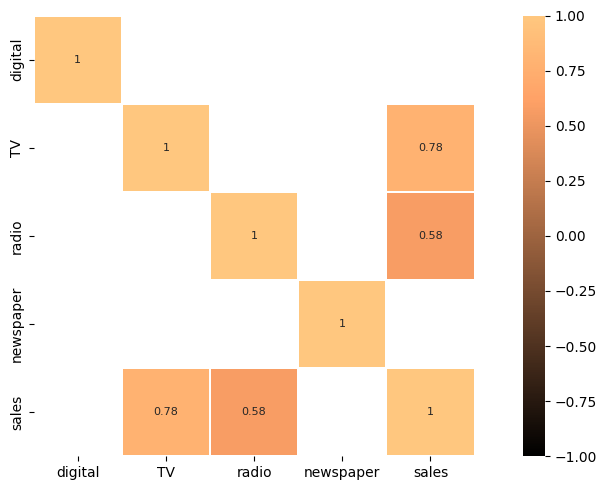

None

In [24]:
#correlation matrix
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='copper', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [11]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<ipython-input-12-e341fd35f4db>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(advertising_df.corr(), dtype=np.bool)


<Axes: >

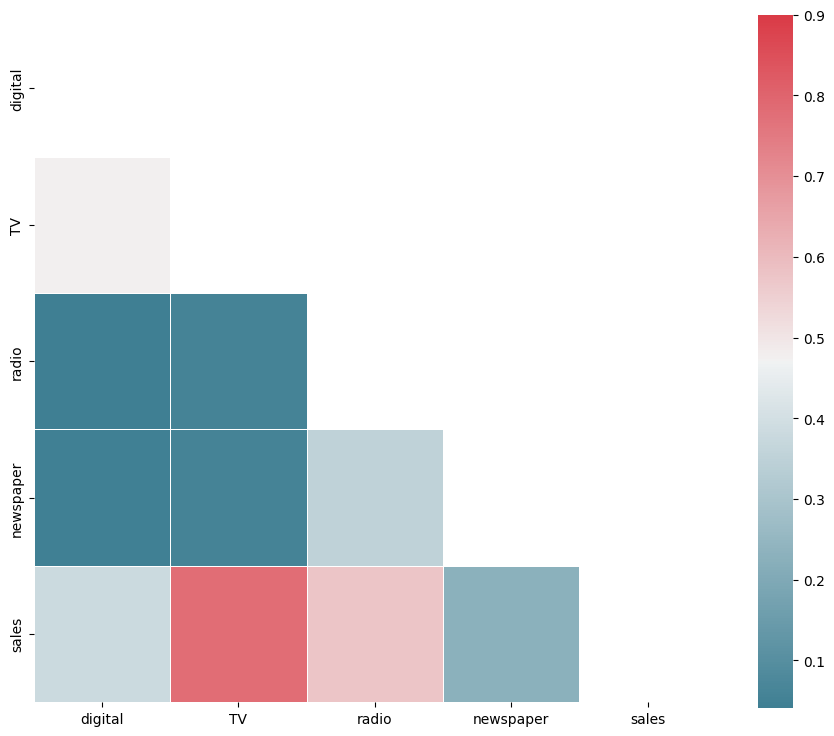

In [12]:
#visualization of Correlation

mask = np.zeros_like(advertising_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Rather than plot them separately, an efficient way to view the linear relationsips between variables is to use a "for loop" that plots all of the features at once.

It seems there's no clear linear relationships between the predictors.

At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

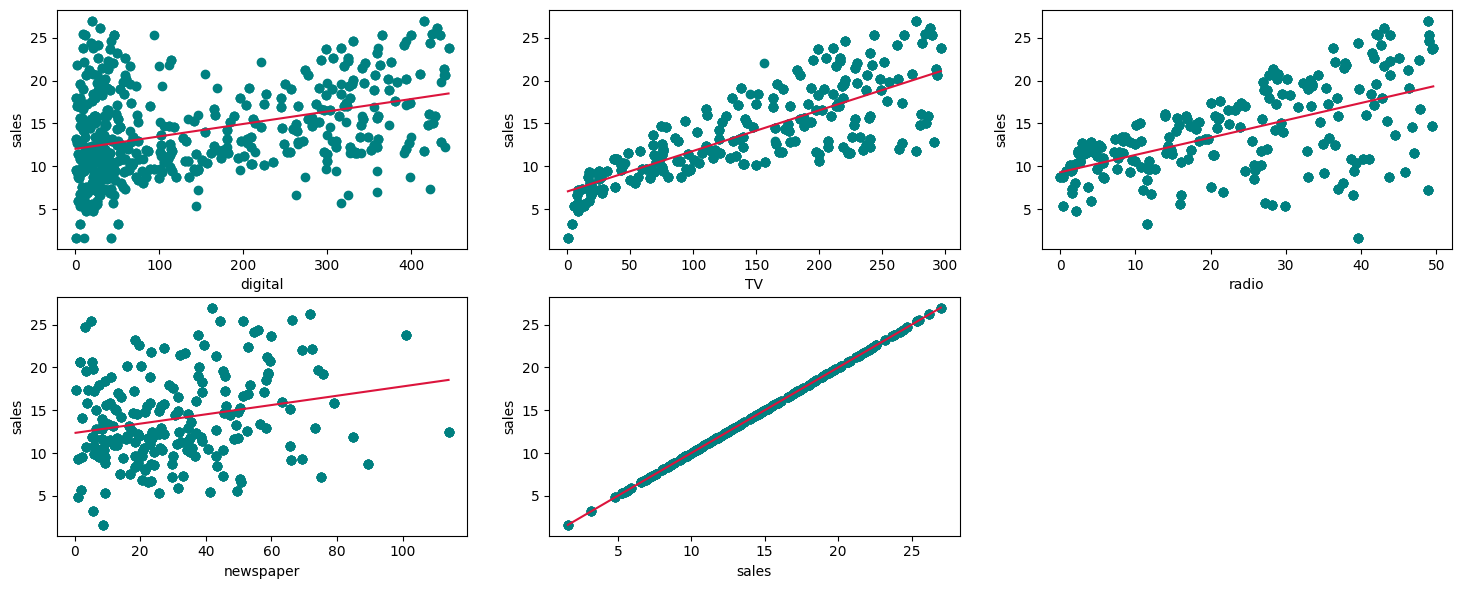

In [13]:
#visiualization of the linear relationship between features  and sales
from scipy import stats
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = advertising_df[col]
    y = advertising_df['sales']
    plt.plot(x, y, 'o', color='teal')

    #regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='crimson')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label


The graph suggests a strong, linear relationship between TV advertising and sales, whereas the link between radio advertising and sales is weaker. Additionally, the correlation between digital advertising and sales is relatively weak.

In [14]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']] #features
y = advertising_df['sales'] #target
normalized_feature =  keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) #training set
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(719, 4) (480, 4) (719,) (480,)


In [16]:
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['mse'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)


Epoch 1/32
23/23 [==============================] - 3s 45ms/step - loss: 3667.3784 - mse: 3667.3784 - val_loss: 2739.5906 - val_mse: 2739.5906
Epoch 2/32
23/23 [==============================] - 0s 15ms/step - loss: 2214.7231 - mse: 2214.7231 - val_loss: 1661.1730 - val_mse: 1661.1730
Epoch 3/32
23/23 [==============================] - 0s 15ms/step - loss: 1397.1422 - mse: 1397.1422 - val_loss: 1095.2131 - val_mse: 1095.2131
Epoch 4/32
23/23 [==============================] - 0s 14ms/step - loss: 970.6771 - mse: 970.6771 - val_loss: 791.7650 - val_mse: 791.7650
Epoch 5/32
23/23 [==============================] - 0s 17ms/step - loss: 719.7321 - mse: 719.7321 - val_loss: 590.1088 - val_mse: 590.1088
Epoch 6/32
23/23 [==============================] - 0s 19ms/step - loss: 551.3692 - mse: 551.3692 - val_loss: 452.0543 - val_mse: 452.0543
Epoch 7/32
23/23 [==============================] - 0s 13ms/step - loss: 431.0633 - mse: 431.0633 - val_loss: 360.3040 - val_mse: 360.3040
Epoch 8/32
23/2

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.evaluate(X_test, y_test)[1]

15/15 [==============================] - 0s 4ms/step - loss: 49.2316 - mse: 49.2316


49.23160171508789

<Axes: >

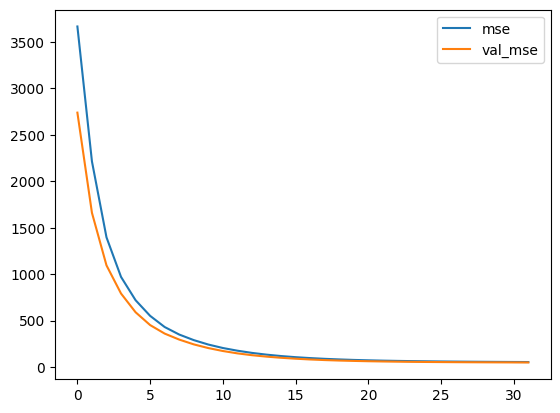

In [19]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot() #visualization

In [20]:
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

15/15 [==============================] - 0s 6ms/step
[20.409727   12.102269   28.888697   21.400919   10.169865   16.69054
 -0.1670391  19.247414   25.548185   17.319122   -0.1670391  18.16984
 -0.09594148  6.6673865  -0.1670391  -0.1670391  20.926847    1.5455205
 -0.1670391   7.8228364  21.245224    2.6037862  14.774467   14.176512
 15.179093   -0.1670391  12.57586    32.765903   20.445      -0.1670391
 16.084896    8.484303   10.725192   24.327019   12.151948    1.2097654
 19.057276   13.6161995  24.20808     1.8767409  22.435896   19.849985
  8.912076    3.0686076  10.434021   13.6737175   6.4747787  19.057276
  0.04998596  4.4764338  12.570329   -0.1670391  11.05772    20.512583
  1.8774738  26.86657     3.3818789  18.418436    0.9670387  24.757978
 -0.1670391  18.076378   -0.1670391  20.35408     6.655582   -0.1670391
 14.174315   17.265123    6.251077   24.76405    -0.1670391  29.568665
 10.475751   25.241812   17.210394   22.247204   14.787714    0.9692177
  8.484303   15.53123

In [28]:
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(9)

,True Value,Predicted Value
0,26.2,20.409727
1,19.0,12.102269
2,12.8,28.888697
3,20.8,21.400919
4,16.9,10.169865
5,23.8,16.690540
6,9.3,-0.167039
7,22.6,19.247414
8,18.9,25.548185


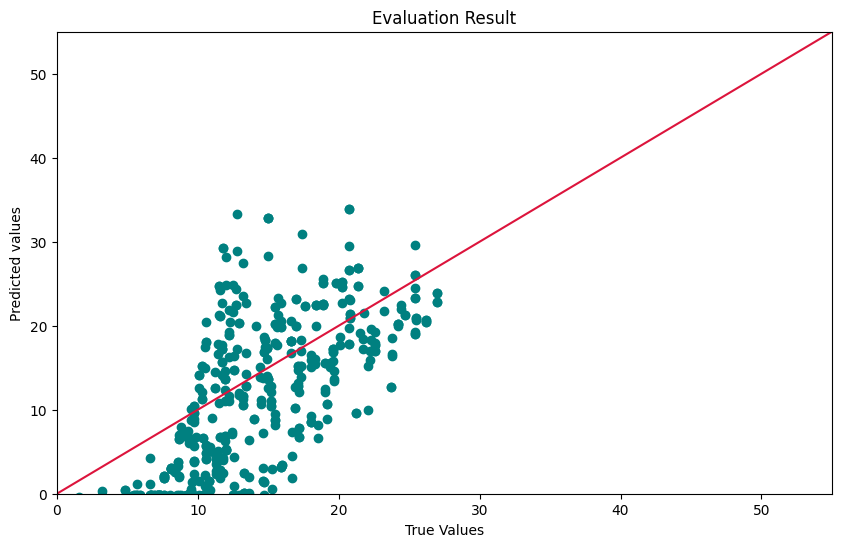

In [22]:
# visualize the prediction uisng diagonal line
y = test_predictions
x = y_test
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='teal')
ax.set(xlim=(0,55), ylim=(0, 55)) #limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='crimson') #45 degree diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()